<a href="https://colab.research.google.com/github/yidi233/dataset/blob/master/women's_clothing_review_on_e_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Women’s Clothing E-Commerce dataset about the reviews written by customers.

Data Source: [Kaggle](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews/version/1#Womens%20Clothing%20E-Commerce%20Reviews.csv) by user *nicapotato*

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [14]:
url = 'https://raw.githubusercontent.com/yidi233/dataset/master/Womens%20Clothing%20E-Commerce%20Reviews.csv'

# Load data into a pandas dataframe
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Clothing ID,Age,Title,ReviewText,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [15]:
df2 = df[['ReviewText', 'Rating']] 
df = df2
df.head()

,ReviewText,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


In [16]:
df.describe()

,Rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [0]:
#checking for nulls
null_count = df.isnull().sum()
null_count
df.dropna(subset=['ReviewText'], inplace=True)

In [18]:
null_count = df.isnull().sum()
null_count

ReviewText    0
Rating        0
dtype: int64

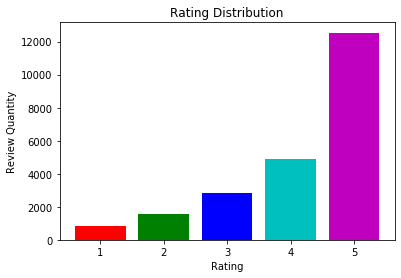

In [19]:
#@title Second Example 
#seperating by groups
df.columns = ['ReviewText','Rating']
groups = df.groupby('Rating').count()
Values = groups.ReviewText
colors = ['r', 'g', 'b', 'c', 'm']
#making bar plot
plt.bar(([1,2,3,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Review Quantity')
plt.show()

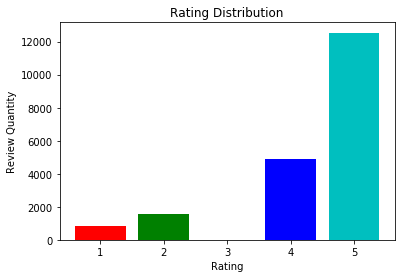

In [21]:
#@title Dropping data that will not help in out modeling
#deleting all instances with ride_rating = 3
df = df[df.Rating != 3]
#separating by groups
groups = df.groupby('Rating').count()
Values = groups.ReviewText
colors = ['r', 'g', 'b', 'c']
#making bar plot
plt.bar(([1,2,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Review Quantity')
plt.show()

In [22]:
#@title Creating new binary_class column
df['binary_class'] = np.where(df['Rating'] > 3, 1, 0)
df

,ReviewText,Rating,binary_class
0,Absolutely wonderful - silky and sexy and comf...,4,1
1,Love this dress! it's sooo pretty. i happene...,5,1
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,This shirt is very flattering to all due to th...,5,1
5,"I love tracy reese dresses, but this one is no...",2,0
...,...,...,...
23477,I'm so impressed with the beautiful color comb...,4,1
23478,I was surprised at the positive reviews for th...,1,0
23479,So i wasn't sure about ordering this skirt bec...,5,1
23481,I was very happy to snag this dress at such a ...,5,1


In [24]:
#@title Second Example
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['ReviewText'], df['binary_class'], random_state = 0)
#setting random number between 1 and 1000
number = random.randint(1,1000)
#printing random training text and X_train shape
print ('Random Review:')
print(' ')
print(X_train[number])
print(' ')
print('X_train shape: ' + str(X_train.shape))

Random Review:
 
This didn't work for me. im normally a m (8/10). got this in xs. that was the correct size for me, i believe. however, the armholes were huge. husband said the top of the dress looked like the autobots symbol from transformers and he wanted me to keep it. but, i sent it back.
 
X_train shape: (14863,)


In [25]:
#@title Turning words into numbers
#importing countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
#creating variable which assigns X_train to numbers
vect = CountVectorizer().fit(X_train)
#translates numbers back to text
vect.get_feature_names()[1:10]

['000', '00p', '02', '03', '03dd', '0in', '0p', '0petite', '0r']

In [26]:
#length of total words
len(vect.get_feature_names())

11915

In [27]:
X_train_vectorized = vect.transform(X_train)
print (X_train_vectorized.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
#@title Creating Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
#@title Calculating AUC
from sklearn.metrics import roc_auc_score
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.7877379406877907


In [30]:
#creating array variable of all the words
feature_names = np.array(vect.get_feature_names())
#creating array of all the regression coefficients per word
coef_index = model.coef_[0]
#creating df with both arrays in it
df = pd.DataFrame({'Word':feature_names, 'Coef': coef_index})
#sorting by coefficient
df.sort_values('Coef')

,Word,Coef
9175,shame,-2.136811
11112,unflattering,-1.972138
1100,awful,-1.898291
1764,bummed,-1.879005
3234,disappointed,-1.841921
...,...,...
11134,unique,1.466173
7123,often,1.513968
10108,stunning,1.571636
5695,justice,1.648311


In [31]:
print(model.predict(vect.transform(["I LOVED the style of this sweater but sadly had to return as the material was too thin and looked wrinkly."])))

[0]
